In [1]:
import Resolvers._
interp.resolvers() = interp.resolvers() :+ Resolver.Http(
    "cibotech",
    "https://dl.bintray.com/cibotech/public/",
    MavenPattern,
    true
)

import Resolvers._


In [2]:
import $ivy.`com.cibo::evilplot:0.4.1`
import $ivy.`com.cibo::evilplot-repl:0.4.1`
import $ivy.`org.ruivieira::scala-ssm:0.1`

import $ivy.$                         

import $ivy.$                              

import $ivy.$                             

In [3]:
import breeze.linalg.{DenseVector, DenseMatrix}
import org.ruivieira.ssm.univariate.{
  StateGenerator,
  UnivariateGenerator,
  UnivariateStructure
}

import breeze.linalg.{DenseVector, DenseMatrix}

import org.ruivieira.ssm.univariate.{
  StateGenerator,
  UnivariateGenerator,
  UnivariateStructure
}

# Univariate models

## Gaussian observations

### Locally constant (random walk)

First, we start by creating a simple univariate Gaussian random walk. This will correspond to a dynamic linear model in the form

\begin{align} y_t &\sim \mathcal{N}\left(\theta_t,V\right) \\
\theta_t &\sim \mathcal{N}\left(\theta_{t-1},W\right)
\end{align}

We start by definind the variance of the latent states as $W=1.5$.

In [4]:
val structure = UnivariateStructure.createLocallyConstant(W = 1.5)

structure: UnivariateStructure = UnivariateStructure(1.0  , 1.0  , 1.5  )

And generate a chain of $n=1000$ states with an initial state of $\theta_0 = 0$.

In [5]:
val states = StateGenerator.states(nobs = 1000,
                                   structure = structure,
                                   state0 = DenseVector[Double](0.0))

Sep 26, 2018 9:57:40 PM com.github.fommil.netlib.BLAS <clinit>
Sep 26, 2018 9:57:40 PM com.github.fommil.netlib.BLAS <clinit>
Sep 26, 2018 9:57:40 PM com.github.fommil.netlib.LAPACK <clinit>
Sep 26, 2018 9:57:40 PM com.github.fommil.netlib.LAPACK <clinit>


states: Vector[org.ruivieira.ssm.package.State[Double]] = Vector(
  DenseVector(-1.504710151447631),
  DenseVector(-4.005465847587514),
  DenseVector(-4.354553846657136),
  DenseVector(-4.090964429230846),
  DenseVector(-3.8886790204564536),
  DenseVector(-2.1425874155478892),
  DenseVector(-1.1682184564618354),
  DenseVector(-3.3981356166143737),
  DenseVector(-3.6590137781214365),
  DenseVector(-1.727922543731949),
  DenseVector(-0.5518069589923127),
...

We can now generate the observations from the states, using an observation variance $V=4.0$.

In [10]:
val observations = UnivariateGenerator.gaussian(states = states,
                                                structure = structure,
                                                V = 4.0)

observations: Vector[Double] = Vector(
  -9.813130907813472,
  -7.990584023190113,
  2.1316191824548856,
  -6.067755532423735,
  -7.957126356837044,
  -4.1117732863679155,
  -8.524885531215773,
  -5.355052151115001,
  -3.995888534432344,
  -3.025142484729351,
  1.2021989398740822,
...

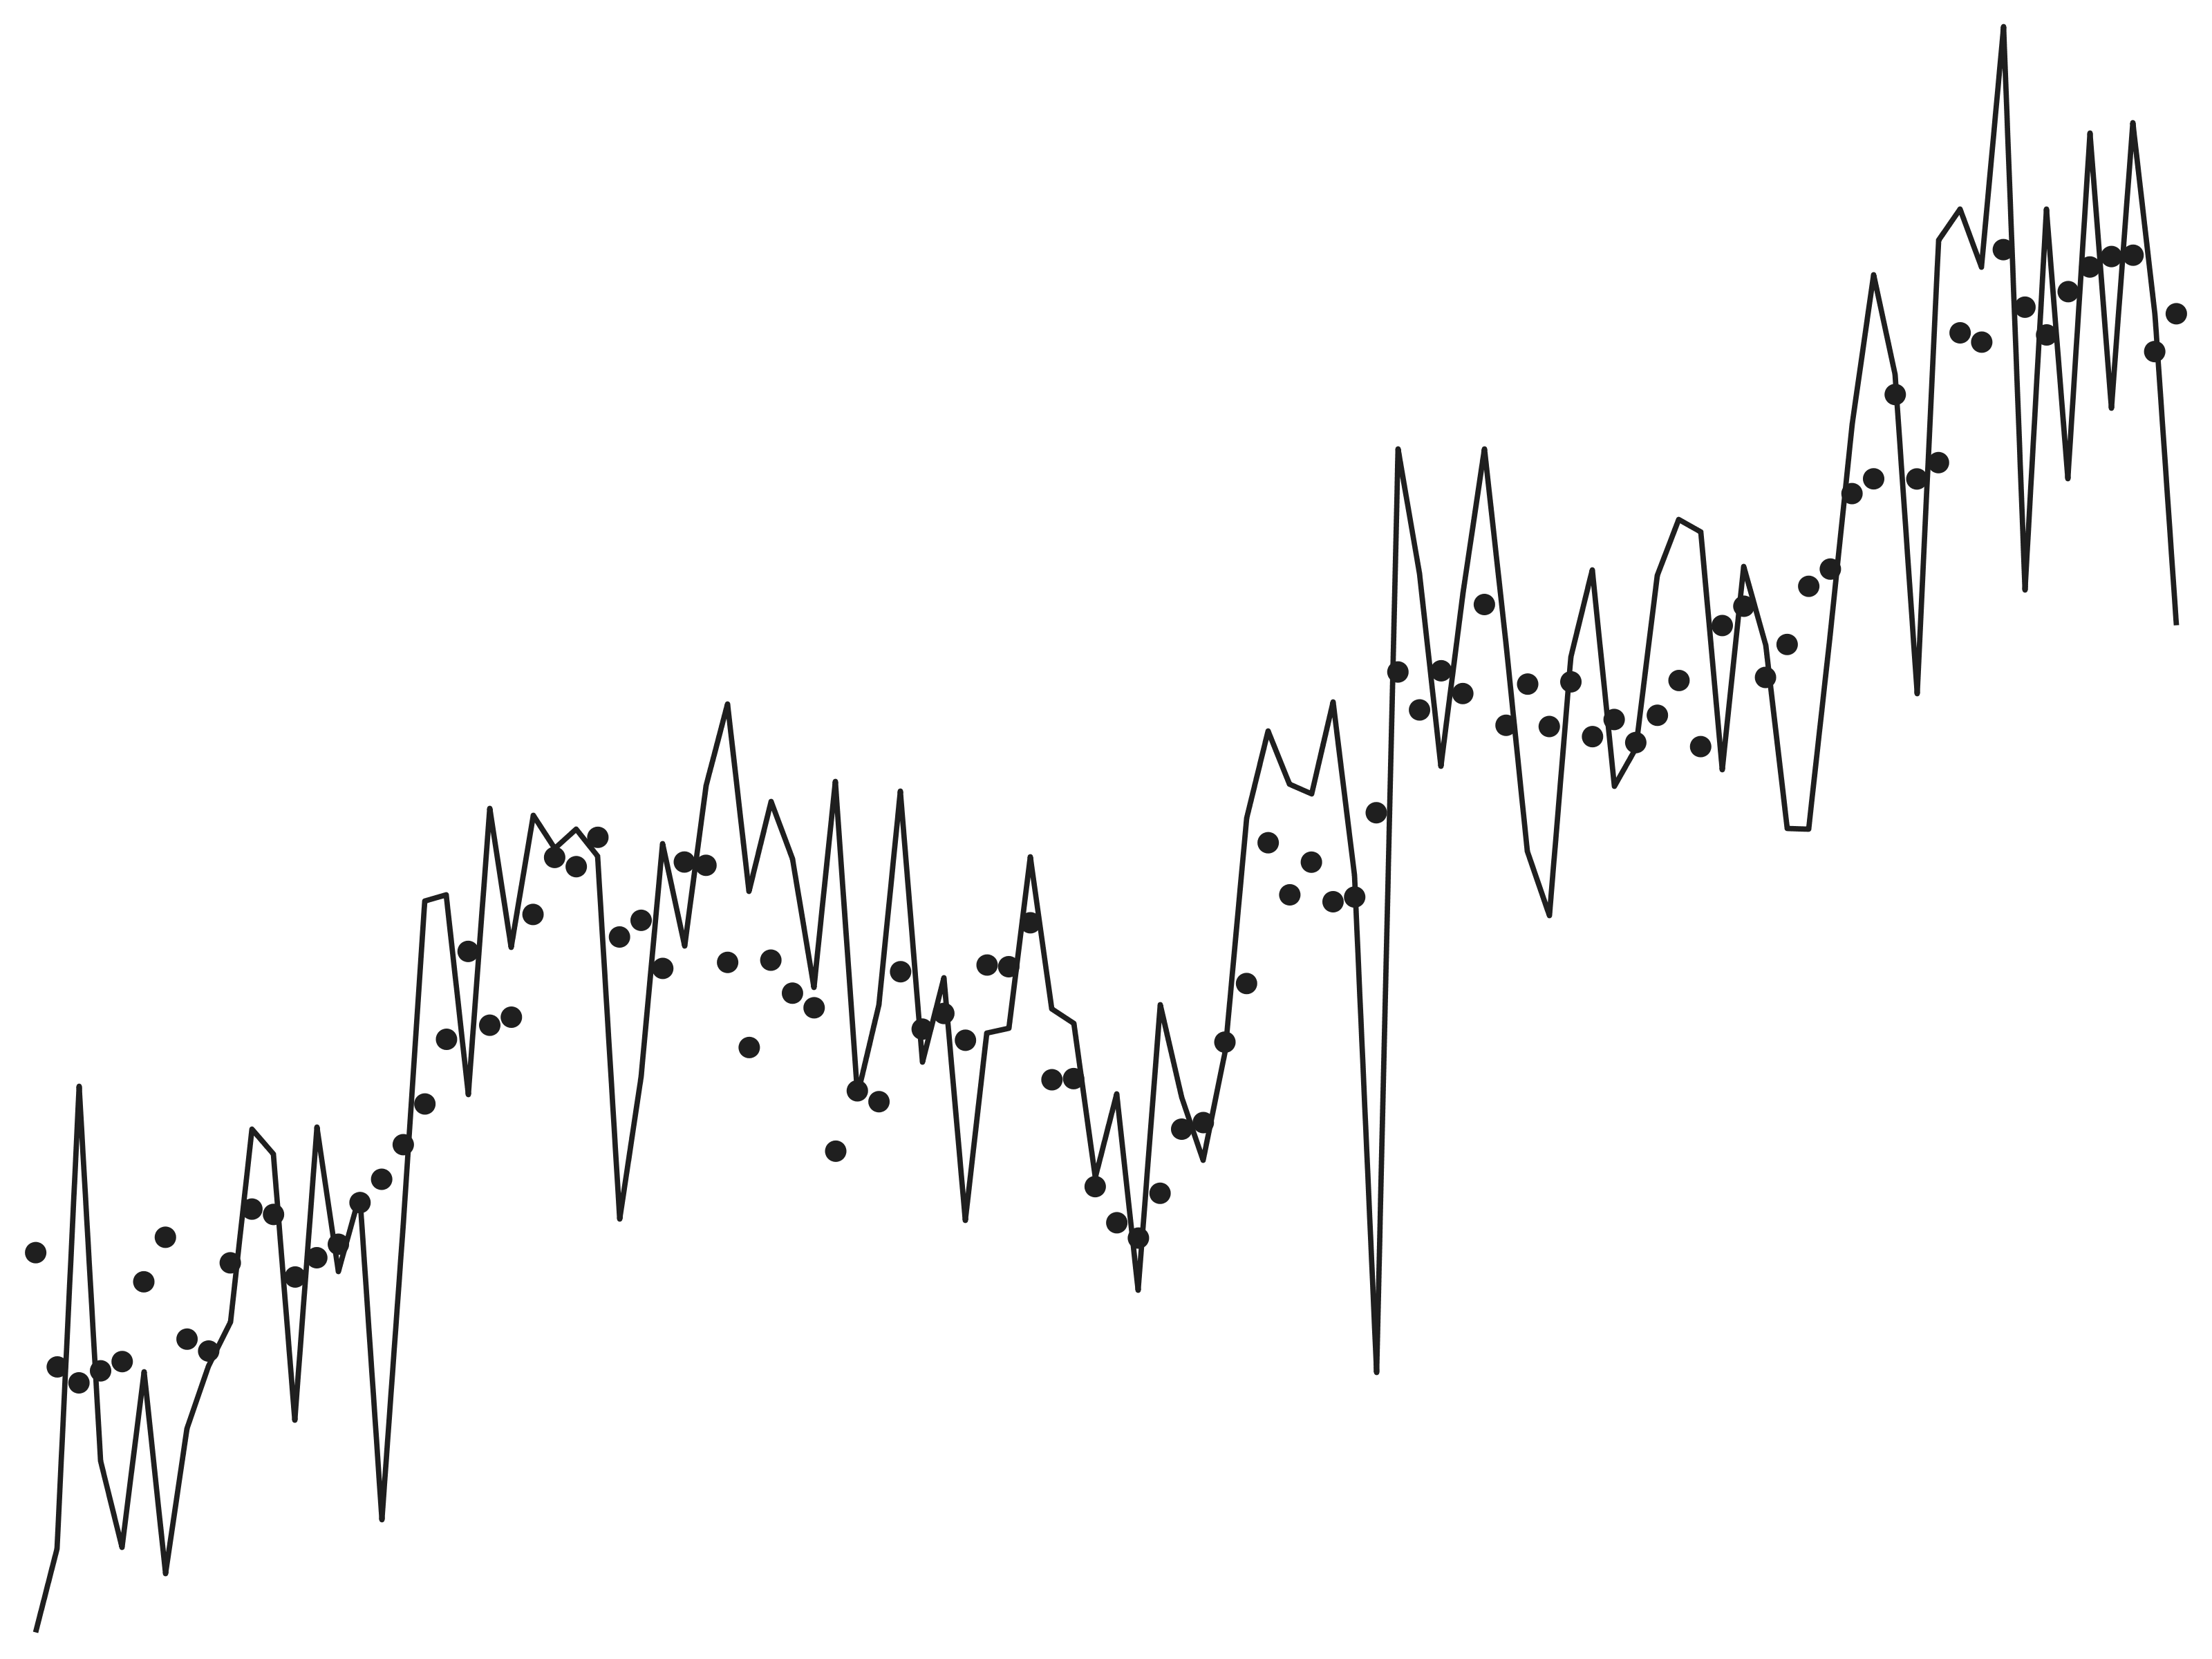

import com.cibo.evilplot._

import com.cibo.evilplot.plot._

import com.cibo.evilplot.plot.aesthetics.DefaultTheme._

import com.cibo.evilplot.numeric.Point


states_plot: Plot = Plot(
  Bounds(0.0, 99.0),
  Bounds(-4.354553846657136, 20.44910557023826),
  XyPlotRenderer(List(Point(0.0,-1.504710151447631), Point(1.0,-4.005465847587514), Point(2.0,-4.354553846657136), Point(3.0,-4.090964429230846), Point(4.0,-3.8886790204564536), Point(5.0,-2.1425874155478892), Point(6.0,-1.1682184564618354), Point(7.0,-3.3981356166143737), Point(8.0,-3.6590137781214365), Point(9.0,-1.727922543731949), Point(10.0,-0.5518069589923127), Point(11.0,-0.6682635020311893), Point(12.0,-2.0378752740443726), Point(13.0,-1.6154416447837645), Point(14.0,-1.3213496756876664), Point(15.0,-0.4088620875034702), Point(16.0,0.10117757083305967), Point(17.0,0.8587621720504699), Point(18.0,1.7495241005128443), Point(19.0,3.1647262094527635), Point(20.0,5.0887681707113535), Point(21.0,3.47298628941...
obs_plot: Plot = Plot

In [11]:
import com.cibo.evilplot._
import com.cibo.evilplot.plot._
import com.cibo.evilplot.plot.aesthetics.DefaultTheme._
import com.cibo.evilplot.numeric.Point

val states_plot = ScatterPlot(Seq.tabulate(100) { i => Point(i.toDouble, states(i)(0)) })
val obs_plot = LinePlot(Seq.tabulate(100) { i => Point(i.toDouble, observations(i)) })
val plot = Overlay(states_plot, obs_plot).render()
publish.png(plot.asBufferedImage)

### A stock exchange example

Let's assume we are following the end of day stock price of company Foo Ltd.
We will simulate a stock price history for 365 days (each timepoint is a day), for a relatively stable stock price, with no trend or seasonality but with natural fluctuation. We also assume that the stock's initial price at day 0 is around \$100. As such we will set an initial state of $\theta_0 = 100$ and low underlying variance ($W=0.01$) with some noise in the data ($V=1.0$).

In [7]:
val stock_structure = UnivariateStructure.createLocallyConstant(W = 0.01)
val states = StateGenerator.states(nobs = 365,
                                   structure = structure,
                                   state0 = DenseVector[Double](100.0))
val observations = UnivariateGenerator.gaussian(states = states,
                                                structure = structure,
                                                V = 1.0)

stock_structure: UnivariateStructure = UnivariateStructure(1.0  , 1.0  , 0.01  )
states: Vector[org.ruivieira.ssm.package.State[Double]] = Vector(
  DenseVector(99.78680062288154),
  DenseVector(100.26624884558552),
  DenseVector(102.03388255437703),
  DenseVector(105.625201972566),
  DenseVector(105.33415776002083),
  DenseVector(102.91081019847178),
  DenseVector(102.42751587310697),
  DenseVector(101.19916482365566),
  DenseVector(102.76492508146914),
  DenseVector(102.93087490118525),
  DenseVector(102.03033335393255),
...
observations: Vector[Double] = Vector(
  99.38015637063377,
  100.61438467289895,
  101.49950588987667,
  106.05296404728294,
  105.1691874217793,
  104.133872379809,
  102.64554389788702,
  100.34367642683276,
  102.13975530656289,
  103.91538916619982,
  102.41639264335903,
...

In [8]:
Scatter((1 until 365), observations.toSeq).plot()

res7: String = "plot-1426975349"

Now (ignoring the complexities of the stock market), let's suppose that on day $t=100$, this company announces a revolutionary breakthrough. We want to incorporate in our simulated data a jump of _twice_ is stock price, regardless of the value at $t=100$.

We can do this by changing the data at the _state_ level at any point. First we create a chain for a "normal" random walk and then we append another one with a starting value of $\theta_{100} = 2\theta_{100}$.

In [9]:
val states_pre = StateGenerator.states(nobs = 100, structure = structure, state0 = DenseVector[Double](100.0))
val states_post = StateGenerator.states(nobs = 265, structure = structure, state0 = states_pre.last * 2.0)
val states = states_pre ++ states_post

states_pre: Vector[org.ruivieira.ssm.package.State[Double]] = Vector(
  DenseVector(98.82503499510088),
  DenseVector(100.75347140076735),
  DenseVector(102.61400348742461),
  DenseVector(103.60993699902369),
  DenseVector(104.10731988767311),
  DenseVector(105.11693765961462),
  DenseVector(107.44395834806993),
  DenseVector(107.55526831805163),
  DenseVector(107.22946098825858),
  DenseVector(106.19430875830102),
  DenseVector(106.42933230702745),
...
states_post: Vector[org.ruivieira.ssm.package.State[Double]] = Vector(
  DenseVector(256.4542820043453),
  DenseVector(255.40719942962374),
  DenseVector(255.0710954720491),
  DenseVector(255.22458300974884),
  DenseVector(255.85937114794743),
  DenseVector(255.02410719219338),
  DenseVector(253.91240527847032),
  DenseVector(254.98412682672023),
  DenseVector(252.64928398740798),
  DenseVector(251.05195463972834),
  DenseVector(251.05243215367832),
...
states: Vector[org.ruivieira.ssm.package.State[Double]] = Vector(
  DenseVector(98.8

It is important to note that due to the Markovian nature of the SSM, changes at the state level will _propagate_ to future states. This means that the jump in stock price will be propagated to future values.

In [10]:
val observations = UnivariateGenerator.gaussian(states = states,
                                                structure = structure,
                                                V = 1.0)
Scatter((1 until 365), observations.toSeq).plot()

observations: Vector[Double] = Vector(
  98.76791478327466,
  99.44480224605408,
  102.18322819215143,
  104.08455394844155,
  103.49572904914345,
  103.71264224462338,
  105.63841898163986,
  106.87033432445901,
  105.89336819861931,
  107.556757017998,
  104.55721302982165,
...
res9_1: String = "plot-960957936"

### Locally linear (mean and trend)

For a locally linear model, we assume the state and observations matrices to be, respectively

$$ \mathsf{F} = \begin{bmatrix} 1 & 0 \end{bmatrix},\qquad \mathsf{G} = \begin{bmatrix} 1 & 1 \\ 0 & 1\end{bmatrix}.$$

The latent states, will then correspond to $\theta_t = \left(\mu, \tau\right)$, that is two components, representing the mean and the trend, respectively. The model will then take the form

\begin{align}
y_t \sim \mathcal{N}\left(\mathsf{F}\theta_t,V\right) \\
\theta_t \sim \mathcal{N}\left(\mathsf{G}\theta_{t-1},\mathsf{W}\right)
\end{align}

The state covariance will now be a matrix

$$ \mathsf{W} = \begin{bmatrix} W_{\tau} & 0 \\ 0 & W_{\mu} \end{bmatrix}$$

representing the variance of the underlying mean and trend respectively.

### Stock exchange (again)

Let's now simulate the stock price of the Foo company, but assuming there's a trend to the values, rather than a jump.
We will create a mean varying a bit ($W_{\mu}=0.5$) but a rather smooth trend ($W_{\tau}=0.05$) and with some noise in the observations ($V=2.0$).

In [27]:
val W = DenseMatrix.eye[Double](2)
W(0,0) = 0.05
W(1,1) = 0.5

val stock_structure = UnivariateStructure.createLocallyLinear(W = W)
val states = StateGenerator.states(nobs = 365,
                                   structure = stock_structure,
                                   state0 = DenseVector[Double](100.0, -1.0))
val observations = UnivariateGenerator.gaussian(states = states,
                                                structure = stock_structure,
                                                V = 2.0)

W: DenseMatrix[Double] = 0.05  0.0  
0.0   0.5  
stock_structure: UnivariateStructure = UnivariateStructure(
  1.0  
0.0  ,
  1.0  1.0  
0.0  1.0  ,
  0.05  0.0  
0.0   0.5  
)
states: Vector[org.ruivieira.ssm.package.State[Double]] = Vector(
  DenseVector(99.0226297726744, -0.6572694131644385),
  DenseVector(98.37715741913001, -0.41377550236256466),
  DenseVector(97.50397897633596, -0.16450921918242228),
  DenseVector(97.65052765827431, 0.4472775698674409),
  DenseVector(97.62848396649082, 1.1824135392159318),
  DenseVector(99.14115324358593, 0.5569171856690674),
  DenseVector(99.39297860861338, -0.02877343767543672),
  DenseVector(99.49852406846871, -0.576117541985426),
  DenseVector(99.39312623630217, -0.6770356481524766),
  DenseVector(98.72471594967918, -0.39906553495557223),
  DenseVector(98.5626543641813, 0.023187887856900402),
...
observations: Vector[Double] = Vector(
  101.16844288351956,
  97.4315584982937,
  97.37012503095563,
  99.97179139386726,
  99.22456286543147,
  95.

In [28]:
Scatter((1 until 365), observations.toSeq).plot()

res27: String = "plot-1095543504"

One of the advantages of this formulation, is that we can decompose easily the states into the mean and the trend.
For instance:

In [31]:
val x = 1 until 365

val plot = Seq(
  Scatter(
    x, states.map(_(0)), name = "trend"
  ),
  Scatter(
    x, states.map(_(1)), name = "mean"
  )
)
plot.plot(title = "Locally linear")


x: Range = Range(
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
...
plot: Seq[Scatter] = List(
  Scatter(
    Some(
      Doubles(
        Vector(
          1.0,
          2.0,
          3.0,
          4.0,
          5.0,
          6.0,
          7.0,
...
res30_2: String = "plot-1662312060"